In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import statistics

In [15]:
# Loading dataframe for Frédérique
csv_path = r"okeanos.csv"
df = pd.read_csv(csv_path)

In [16]:
# Loading dataframe for Jan
cwd = os.getcwd()
csv_path = cwd+"\okeanos.csv"
df = pd.read_csv(csv_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bardha/Documents/GitHub/leren_en_beslissen_2024_week2\\okeanos.csv'

['M' 'V']


/tmp/ipykernel_5350/681394428.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, '500_split_wattage']= (
/tmp/ipykernel_5350/681394428.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, '2k_wattage']= (
/tmp/ipykernel_5350/681394428.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

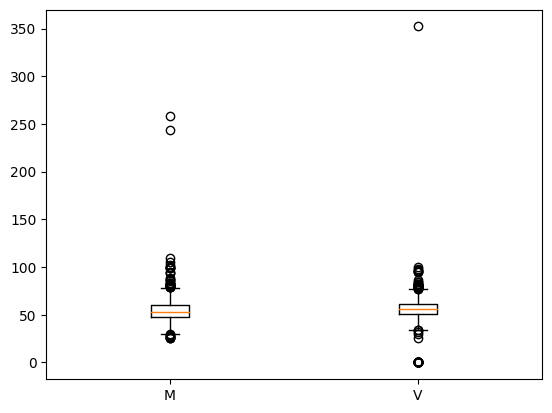

In [20]:
# Frédérique's boxplots
filtered_df = df.dropna(subset=['500_split', '2k tijd'])

def entry_to_seconds(entry):
    if pd.isna(entry):
        return None
    # Define your processing logic for each type of entry
    if ':' and '.' in entry:
        # Process entries like '1:47.4'
        minutes = pd.to_numeric(entry.split(':')[0])
        seconds = pd.to_numeric(entry.split(':')[1])
        return minutes * 60 + seconds
    if ':' and ',' in entry:
        # Process entries like '1:47,4'
        minutes = pd.to_numeric(entry.split(':')[0])
        seconds = pd.to_numeric(entry.split(':')[1].replace(',', '.'))
        return minutes * 60 + seconds
    else:
        # Process entries like '1.47.6'
        minutes = pd.to_numeric(entry.split('.')[0])
        seconds = pd.to_numeric(entry.split('.')[1])
        little_seconds = pd.to_numeric(entry.split('.')[2])
        return minutes * 60 + seconds + little_seconds/100

# Convert seconds to wattage
def seconds_to_wattage(filtered_df, column_name):
    # Apply the process_entry function to the specified column
    return 2.8 / filtered_df[column_name].apply(entry_to_seconds) ** 3

filtered_df.loc[:, '500_split_wattage']= (
    seconds_to_wattage(filtered_df, '500_split')
)

filtered_df.loc[:, '2k_wattage']= (
    seconds_to_wattage(filtered_df, '2k tijd')
)

filtered_df.loc[:, 'rate_difference'] = (
    filtered_df['500_split_wattage'] / filtered_df['2k_wattage']
)

filtered_df.loc[:, 'difference'] = (
    filtered_df['500_split_wattage'] - filtered_df['2k_wattage']
)


def improvement_by_feature_and_person(filtered_df, feature):
    unique_values = filtered_df[feature].unique()
    print(unique_values)
    data = []

    for value in unique_values:
        men = filtered_df.loc[(df[feature] == value)]
        unique_men = men.naam.drop_duplicates().tolist()
        men_df = filtered_df[filtered_df['naam'].isin(unique_men)]
        men_improvement = men_df['rate_difference'].tolist()
        data.append(men_improvement)

    plt.boxplot(data, labels=unique_values, notch=None, vert=None, patch_artist=None, widths=None)
    plt.show()

improvement_by_feature_and_person(filtered_df, 'zone')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the threshold
threshold = 0.001

# Filter the DataFrame
filtered_df = df[(df['wattage'] < threshold) & (df['2k_wattage'] < threshold)]

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wattage', y='2k_wattage', data=filtered_df)
plt.title('Correlation between 500m Split Wattage and 2k Wattage (Under Threshold)')
plt.xlabel('500m Split Wattage')
plt.ylabel('2k Wattage')

# Add the y=x line
# plt.plot([0, 0.001], [0, 0.001], color='red', linestyle='--', linewidth=2, label='y=x')

plt.legend()
plt.grid(True)
plt.show()

# Correlation information for the filtered data
correlation = filtered_df['wattage'].corr(filtered_df['2k_wattage'])
print(f'Correlation coefficient (under threshold): {correlation}')

KeyError: 'wattage'